# Chapter 3 - Linear Regression

*Курсив*- [Load Datasets](#Load-Datasets)
- [3.1 Simple Linear Regression](#3.1-Simple-Linear-Regression)
- [3.2 Multiple Linear Regression](#3.2-Multiple-Linear-Regression)
- [3.3 Other Considerations in the Regression Model](#3.3-Other-Considerations-in-the-Regression-Model)

In [1]:
# This code is quoted from
# https://github.com/JWarmenhoven/ISLR-python

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Datasets
Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [3]:
advertising = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Advertising.csv', usecols=[1,2,3,4])
print("-----------------head--------------------\n", advertising.head(), "\n\n\n-----------------info--------------------") # S
advertising.info()

-----------------head--------------------
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9 


-----------------info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
credit = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [5]:
auto = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Auto.csv', na_values='?').dropna()
print("-----------------head--------------------\n", auto.head(), "\n\n\n-----------------info--------------------") # S
auto.info()

-----------------head--------------------
     mpg  cylinders  displacement  ...  year  origin                       name
0  18.0          8         307.0  ...    70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...    70       1          buick skylark 320
2  18.0          8         318.0  ...    70       1         plymouth satellite
3  16.0          8         304.0  ...    70       1              amc rebel sst
4  17.0          8         302.0  ...    70       1                ford torino

[5 rows x 9 columns] 


-----------------info--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   accele

In [6]:
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0


## 3.1 Simple Linear Regression

### Figure 3.1 - Least squares fit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


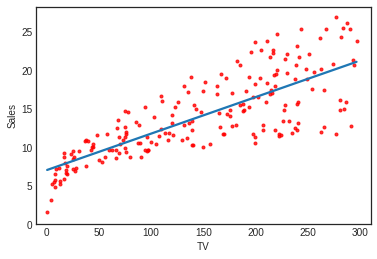

In [7]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

### Figure 3.2 - Regression coefficients - RSS
Note that the text in the book describes the coefficients based on uncentered data, whereas the plot shows the model based on centered data. The latter is visually more appealing for explaining the concept of a minimum RSS. I think that, in order not to confuse the reader, the values on the axis of the B0 coefficients have been changed to correspond with the text. The axes on the plots below are unaltered.

In [8]:
# B
myArray = np.array([10, 20, 30])
scaledArray = scale(myArray, with_mean=True, with_std=True)
scaledArray


array([-1.22474487,  0.        ,  1.22474487])

In [9]:
# B
print("scaledArray.shape =", scaledArray.shape)
reshapedArray = scaledArray.reshape(-1, 1)
print("reshapedArray.shape =", reshapedArray.shape)
print("reshapedArray =\n", reshapedArray)

scaledArray.shape = (3,)
reshapedArray.shape = (3, 1)
reshapedArray =
 [[-1.22474487]
 [ 0.        ]
 [ 1.22474487]]


In [10]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

# To see what scale is doing
var = scale(advertising.TV, with_mean=True, with_std=False) # S
print(type(var))                                            # S


X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1) #np.ndarray.reshape()
# X = advertising.TV.values.reshape(-1,1) #np.ndarray.reshape()
print("After scaling: X.ravel().mean() =", X.ravel().mean())
y = advertising.Sales
print("y.ravel().mean() =", y.ravel().mean())
print("X.ndim = ", X.ndim)
print("y.ndim = ", y.ndim)

# spoil X
# X = X + 100


# print("X = ", X)
# print("y = ", y)

regr.fit(X,y)
# S
# if regr.intercept_ is b and regr.coef_ is a
# then y = a*x + b
#
print(regr.intercept_)
print(regr.coef_)

<class 'numpy.ndarray'>
After scaling: X.ravel().mean() = 1.0089706847793422e-14
y.ravel().mean() = 14.0225
X.ndim =  2
y.ndim =  1
14.0225
[0.04753664]


In [11]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
#print("B0.shape - ", B0.shape, "    B1.shape - ", B1.shape)
#print(B0)
#print("--------------------------\n", B1)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
#print("-------------XX----------------\n", xx, "\n----------------------------")
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000
#print(Z)
# Z is all RSS for bad coefficients, though good point is also there
# Now compute the minimal RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'  # S, What is it?
#print ("min_RSS =", min_RSS)
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

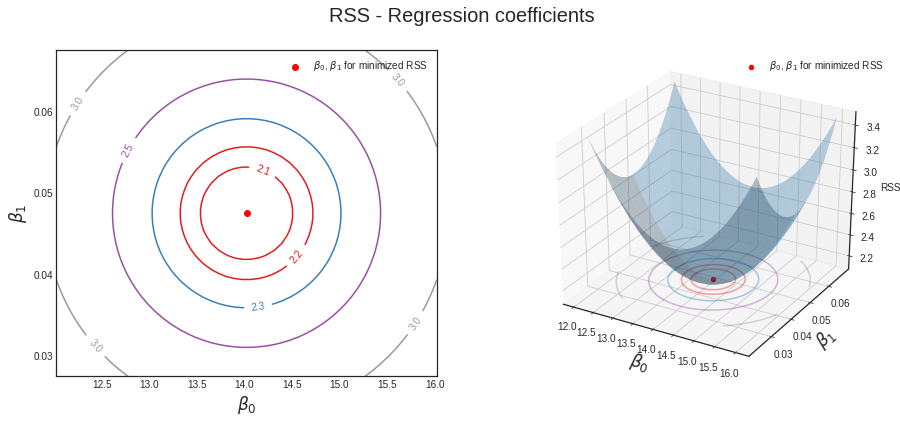

In [12]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

# 1 line
# 2 columns
# 1 or 2 column used for axes
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
# we will use the approximated Z for those levels
# cmap is a sequence of colors
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
# The scatter is plotted for a single point of center
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
# again scatter for a single point of a minimum
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

### Confidence interval on page 67 & Table 3.1 & 3.2 - Statsmodels 

In [13]:
est = smf.ols('Sales ~ TV', advertising).fit()
print(est.summary()) # S
print("\n -----------est.summary().tables[1]:-----") # B
est.summary().tables[1]

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        19:08:11   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [14]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.102530583131351

### Table 3.1 & 3.2 - Scikit-learn

In [15]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


In [16]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)



0.611875050850071

## 3.2 Multiple Linear Regression

### Table 3.3 - Statsmodels

In [17]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [18]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Table 3.4 & 3.6 - Statsmodels

In [19]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        19:08:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table 3.5 - Correlation Matrix

In [20]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [21]:
credit.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance,Student2
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,0.019632
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,-0.006015
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,-0.002028
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,-0.026164
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,-0.029844
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,0.072085
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.259018
Student2,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.259018,1.000000


### Figure 3.5 - Multiple Linear Regression

In [22]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].to_numpy()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [23]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [24]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  del sys.path[0]


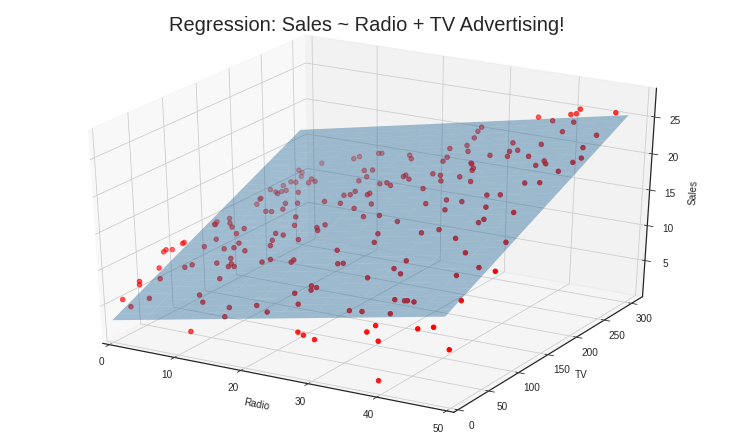

In [25]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising!', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

## 3.3 Other Considerations in the Regression Model

### Figure 3.6

In [ ]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

###  Table 3.7

In [ ]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

### Table 3.8

In [ ]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

In [ ]:
est = smf.ols('Balance ~ Rating + Age + Income + Student2', credit).fit()
est.summary()

The cell below illustrates that the numbers will be different for the simple regression. 

In [ ]:
est = smf.ols('Balance ~ Age', credit).fit()
est.summary()

In [ ]:
anova_table = sm.stats.anova_lm(est, typ=2)
anova_table

In [ ]:
est = smf.ols('Balance ~ Rating*Age + Income + C(Student2)', credit).fit()
est.summary()

In [ ]:
anova_table = sm.stats.anova_lm(est, typ=2) #Balance ~ Rating*Age + Income + C(Student2)
anova_table

### Table 3.9 - Interaction Variables

In [ ]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

### Figure 3.7 - Interaction between qualitative and quantative variables

In [ ]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

In [ ]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
# from b0 + b1 to b0 + b1 + 150*b2
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
# from b0 to b0 + 150*b2
print ("student1 = \n", student1)
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])
print ("non_student1 = \n", non_student1)
# why 50 points?

# we could just add b1 to the first array to get the second one

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

### Figure 3.8 - Non-linear relationships

In [ ]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### Table 3.10

In [ ]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

In [ ]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

### Figure 3.9

In [ ]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].to_numpy()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

### Figure 3.14

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

In [ ]:
# Experiment with credit dataset above
print(dir(credit))
print(credit.head)
print(credit.info())
print("=======credit.Limit.describe():\n", credit.Limit.describe(), "\n")
print("=======credit.Age.describe():\n", credit.Age.describe(), "\n")
print("=======credit.Rating.describe():\n", credit.Rating.describe(), "\n")


### Figure 3.15

In [ ]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']].to_numpy()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']].to_numpy()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

In [ ]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

In [ ]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

### Variance Inflation Factor - page 102

In [ ]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

In [ ]:
credit_est = smf.ols("Balance ~ Rating*Age + Income + Student2", credit).fit()
credit_est.summary()


In [ ]:
# Predict
Rating = 300,
Age = 40,
Income = 50,
Student2 = 0.

d = {"Rating": 300, "Age": 40, "Income": 50, "Student2": 0}
prediction = credit_est.get_prediction(exog=d)
print(dir(prediction))
prediction.summary_frame(alpha=0.10)

In [ ]:
anova_table = sm.stats.anova_lm(credit_est, typ=2)
anova_table

In [ ]:
credit_est_simple = smf.ols("Balance ~ Rating", credit).fit()
credit_est_simple.summary()